![](https://derrickmartins.files.wordpress.com/2015/11/time-series-analysis.png)

# Time series analysis using Pandas

https://www.kaggle.com/mahirkukreja/delhi-weather-data

In [1]:
import calendar
import pandas as pd
import matplotlib.pyplot as plt
from random import random
%matplotlib inline

In [2]:
df = pd.read_csv("data/dataset.csv", parse_dates=['datetime_utc'], index_col='datetime_utc')

In [3]:
df.head()

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


### Clean data
![](https://y1vwcp5chj-flywheel.netdna-ssl.com/wp-content/uploads/2016/10/blog-meme.jpg)

In [6]:
df.columns

Index(['conds', 'dewptm', 'fog', 'hail', 'heatindexm', 'hum', 'precipm',
       'pressurem', 'rain', 'snow', 'tempm', 'thunder', 'tornado', 'vism',
       'wdird', 'wdire', 'wgustm', 'windchillm', 'wspdm'],
      dtype='object')

In [9]:
df.describe()

,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wgustm,windchillm,wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [5]:
# rename columns
new_cols = [x.replace(' _','') for x in df.columns]
df.columns = new_cols

In [8]:
# remove field with all NaNs
df = df.drop('precipm', axis=1)

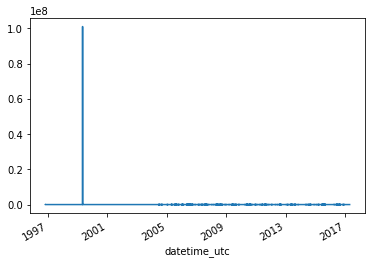

In [10]:
df['pressurem'].plot()

In [11]:
# take care of wrong readings
df['pressurem'] = df['pressurem'].apply(lambda x: df['pressurem'].mean() if not 800<x<1500 else x)
df['hum'] = df['hum'].apply(lambda x: df['hum'].mean() if x>120 else x)
df['vism'] = df['vism'].apply(lambda x: df['vism'].mean() if x>10 else x)
df['wspdm'] = df['wspdm'].apply(lambda x: df['wspdm'].mean() if x>300 else x)
df['tempm'] = df['tempm'].apply(lambda x: df['tempm'].mean() if x>50 else x)

In [12]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [14]:
# extra columns for time analysis
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year

### Quantitative plots over years/months/hours

In [17]:
# list of numeric columns
cols = ['dewptm', 'fog', 'hail', 'heatindexm', 'hum', 'pressurem', 'rain', 'snow', 'tempm', 'thunder', 'tornado', 
        'vism', 'wdird', 'wgustm', 'windchillm', 'wspdm']

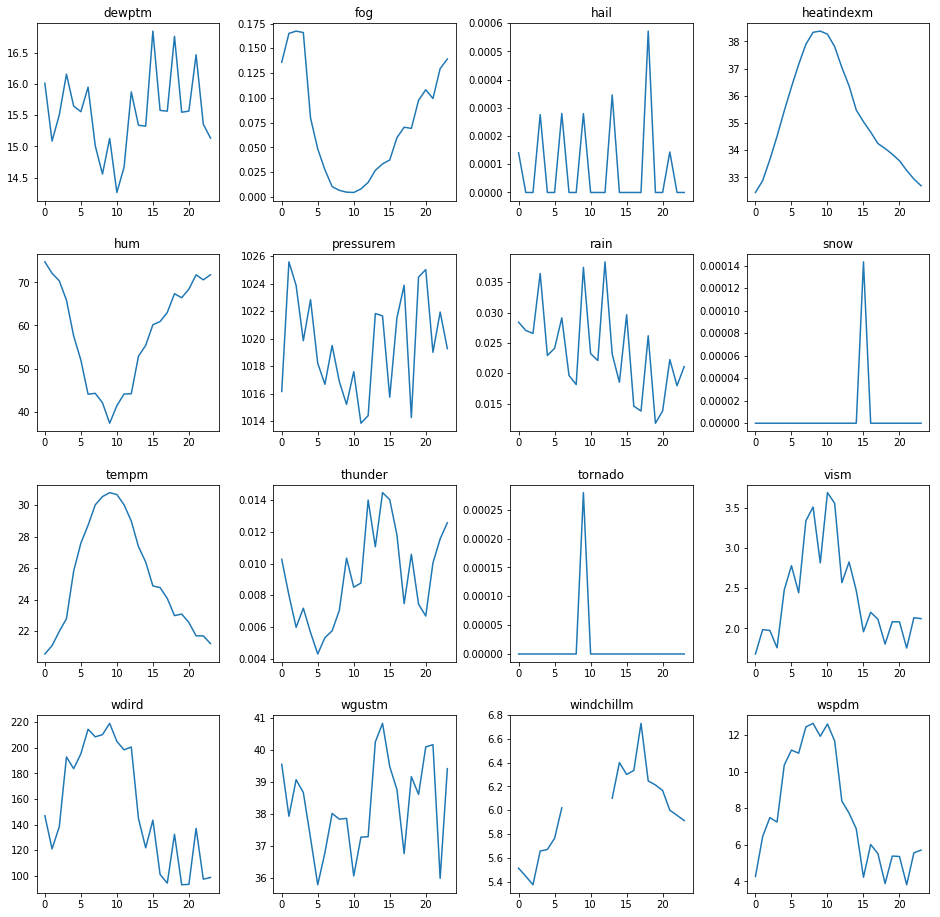

In [20]:
# quantitative plots
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for idx, col in enumerate(cols):
    ax = axes[idx // 4, idx % 4]
    ax.plot(df.groupby('hour')[col].mean())
    ax.set_title(col)

fig.subplots_adjust(wspace=0.3, hspace=0.3)

### Weather conditions trends per month
![](https://i.pinimg.com/originals/19/a5/66/19a566d915debc41d7e303666b7ea10f.jpg)

In [21]:
month_wise_conds = df.groupby(['month', 'conds'])['month'].count()

In [22]:
month_wise_conds

month  conds                       
1      Blowing Sand                       6
       Clear                            317
       Drizzle                            8
       Fog                             1434
       Haze                            1212
       Heavy Fog                        269
       Heavy Rain                         5
       Heavy Thunderstorms and Rain       2
       Light Drizzle                     29
       Light Fog                         22
       Light Hail Showers                 1
       Light Rain                        57
       Light Thunderstorms and Rain      18
       Mist                            1070
       Mostly Cloudy                    208
       Overcast                          81
       Partial Fog                      325
       Partly Cloudy                    183
       Patches of Fog                   302
       Rain                              25
       Scattered Clouds                 155
       Shallow Fog                      

In [23]:
month_wise_conds_df = month_wise_conds.unstack(level=1)

In [24]:
month_wise_conds_df

conds,Blowing Sand,Clear,Drizzle,Fog,Funnel Cloud,Haze,Heavy Fog,Heavy Rain,Heavy Thunderstorms and Rain,Heavy Thunderstorms with Hail,...,Scattered Clouds,Shallow Fog,Smoke,Squalls,Thunderstorm,Thunderstorms and Rain,Thunderstorms with Hail,Unknown,Volcanic Ash,Widespread Dust
month,,,,,,,,,,,,,,,,,,,,,
1,6.0,317.0,8.0,1434.0,NaN,1212.0,269.0,5.0,2.0,NaN,...,155.0,711.0,2439.0,NaN,3.0,26.0,1.0,28.0,1.0,10.0
2,12.0,438.0,5.0,279.0,1.0,2850.0,17.0,1.0,NaN,1.0,...,94.0,310.0,1907.0,NaN,4.0,26.0,NaN,21.0,1.0,66.0
3,34.0,226.0,4.0,35.0,NaN,4703.0,7.0,4.0,1.0,NaN,...,95.0,70.0,1484.0,NaN,7.0,30.0,4.0,13.0,1.0,121.0
4,53.0,347.0,4.0,1.0,NaN,4998.0,NaN,NaN,NaN,NaN,...,252.0,10.0,864.0,1.0,27.0,30.0,2.0,37.0,NaN,532.0
5,73.0,972.0,4.0,NaN,NaN,4641.0,NaN,NaN,2.0,NaN,...,350.0,8.0,337.0,1.0,34.0,77.0,NaN,113.0,NaN,1058.0
6,132.0,324.0,7.0,NaN,NaN,5768.0,NaN,1.0,3.0,NaN,...,289.0,1.0,178.0,3.0,28.0,74.0,1.0,65.0,NaN,757.0
7,26.0,15.0,24.0,NaN,NaN,6119.0,NaN,14.0,4.0,NaN,...,282.0,NaN,42.0,NaN,41.0,87.0,NaN,5.0,NaN,95.0
8,4.0,7.0,30.0,2.0,1.0,5894.0,NaN,1.0,7.0,NaN,...,249.0,12.0,48.0,NaN,30.0,74.0,3.0,3.0,NaN,14.0
9,26.0,84.0,16.0,2.0,NaN,5940.0,NaN,2.0,1.0,NaN,...,240.0,2.0,332.0,NaN,13.0,42.0,NaN,6.0,NaN,13.0


In [25]:
# color dict of weather conditions
colordic = {}
for idx, cond in enumerate(month_wise_conds_df.columns.values):
    colordic[cond] = (random(), random(), random(), 1)

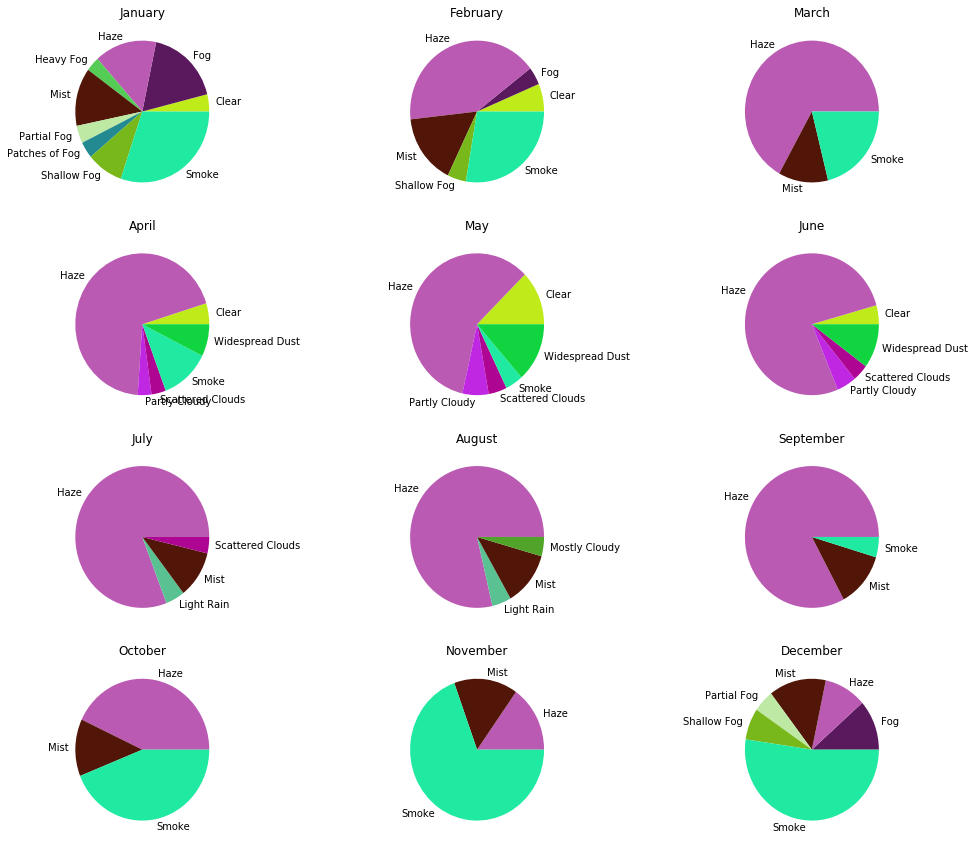

In [26]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

for i, (idx, row) in enumerate(month_wise_conds_df.iterrows()):
    ax = axes[i // 3, i % 3]
    # remove conditions with small percentage
    row = row[row.gt(row.sum() * .03)]
    # set color list for pie chart
    colors = [colordic[val] for val in row.index]
    ax.pie(row, labels=row.index, colors=colors)
    ax.set_title(calendar.month_name[idx])

fig.subplots_adjust(wspace=1.0, hspace=0.2)

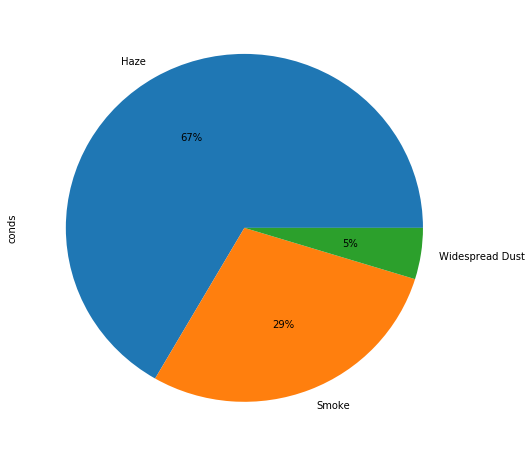

In [27]:
# what has been the weather like on this day for past 20 years?
df.query("month == 10 and day == 7 and hour == 12")['conds'].value_counts().plot.pie(figsize=(8, 8), autopct='%1.0f%%')

In [28]:
# month wise data over the years
pv = pd.pivot_table(df.query("year%5 == 0"), index=['month'], columns=['year'],
                    values='vism', aggfunc='mean')

In [30]:
pv

year,2000,2005,2010,2015
month,,,,
1,2.074407,1.332308,0.653032,0.842500
2,2.548975,2.059009,1.594395,1.598744
3,NaN,2.355833,2.195021,2.321371
4,2.000000,2.541667,2.243590,2.412708
5,1.500000,2.191057,2.105932,2.386640
6,2.380822,1.915612,1.908898,2.072917
7,3.022175,2.012295,1.875676,1.981781
8,3.489575,2.750000,1.953036,2.072464
9,3.519273,2.468619,1.923913,2.256356


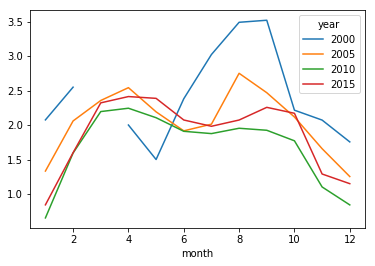

In [29]:
pv.plot()

## Depressing, but true...
![](https://s3.scoopwhoop.com/anj/sw/a1153a33-b90b-4fc2-a569-745a78b950e8.jpg)